# 4. Introduction to Statistics
I have been meaning to get to an introductory statistics post for quite some time now! Statistics play an incredibly important role in modern day machine learning. For instance, while it is a far less "sexy" description, modern day machine learning can most often be reduced to variations of **statistical learning**, where as **statistical model** can be defined as follows:

> A statistical model is a mathematical model which is modified or trained by the input of data points. Statistical models are often but not always probabilistic.

Now, most of this post will probably be familiar in some capacity, but the main goal is not to introduce new concepts. Rather, it is to make concepts that we will be using frequently more concrete.

## 1. Population vs. Sample
One of the first concepts that you must have a good understanding of when interacting with statistics and statistical learning is that of a **population** and a **sample**. Many analysis and algorithms rest upon the correct usage of these two different groups, so having a good intuition surrounding them both is paramount. 

Simply put, a population is defined as follows:

> **Population**: A population includes all of the elements that make up a specified group. 

An example of a population in the context of US voting would be all of the citizens who will be voting in the United States. If you are familiar with a **set theory**, you can think of this as the **universe**. 

A sample, can then be defined as:

> **Sample**: A subgroup of the population, which can be used to describe the entire population.

In this case, if we selected 100 voters randomly from each state (5,000 voters in total), that could constitute as our sample. Continuing our set theory analogy, we can think of this as a subset. 

### 1.1 Why Sample 
In general, the main reasons that we would sample from a population and work with that subgroup are as follows:
* Impossible to get data on the entire population
* Computationaly infeasible to run analysis on the entire population

Now, the main benefit of sampling and being able to work with that subgroup is that we can then **make inferences** about the entire population. By gathering a sample we can use techniques and metrics described in the coming sections in order to make inferences and generate opinions about the entire population. 

### 1.2 Sampling Visualization
To make this all a bit more concrete, let's say that we have the following data set: 1000 people whom we know their height and income. This can be visualized a 2-d plot below:

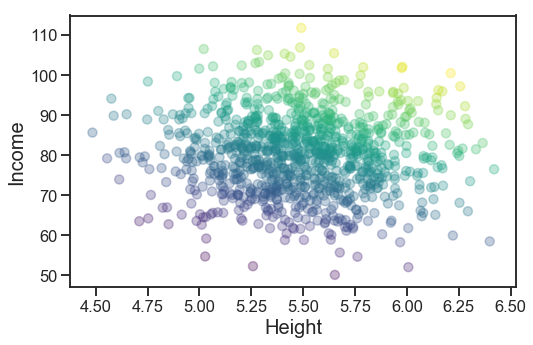

In [212]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

fig, ax = plt.subplots(figsize=(8,5))

rng = np.random.RandomState(0)
x = rng.randn(1000)/3 + 5.5
y = rng.randn(1000)/0.1 + 80
# colors = rng.rand(100)
colors = x*y

plt.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')
ax.set_xlabel('Height', fontsize=20)
ax.set_ylabel('Income', fontsize=20)
plt.show()

Now, let's say that we want to sample from this population (for one of the reasons listed above). This would look like:

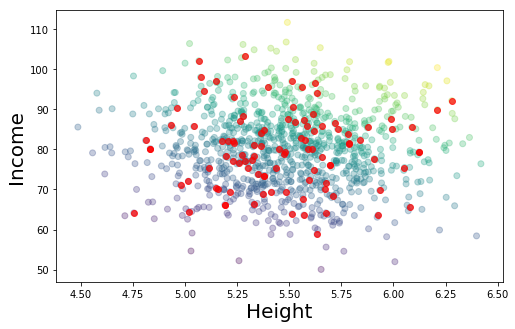

In [66]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x, y, c=colors, alpha=0.3,
            cmap='viridis')

sample_idxs = np.random.randint(0, 1000, size=100)
x_sample = x[sample_idxs]
y_sample = y[sample_idxs]
sample_colors = x_sample*y_sample
ax.scatter(x_sample, y_sample, c='red', alpha=0.7)

ax.set_xlabel('Height', fontsize=20)
ax.set_ylabel('Income', fontsize=20)

plt.show()

And if we no longer overlay the original population in the background, we can look at only our freshly sampled data set:

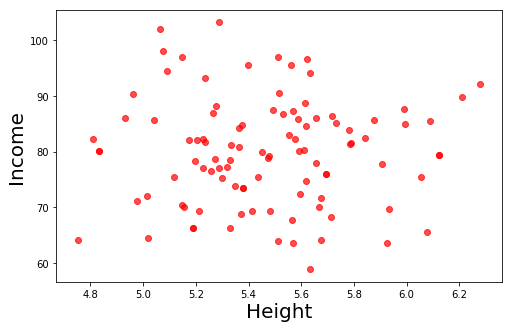

In [67]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_sample, y_sample, c='red', alpha=0.7)
ax.set_xlabel('Height', fontsize=20)
ax.set_ylabel('Income', fontsize=20)
plt.show()

When describing populations and samples, there is additional vocabulary that we must be aware of; specifically:

* A **statistic** is used to describe a **sample**.
* A **parameter** is used to describe a **population**.

Now, we will pause our discussion surrounding sampling here for now, and move on to build up our vocabulary in several other areas of statistics before coming back. Once we have a deeper understanding of a few other areas, it will strengthen the need for sampling and it's connection to the population. 

## 2. Descriptive Statistics
With a good understanding of the differences between a population and a sample, we can now move onto **descriptive statistics**. Simply put: 

> Descriptive statistics entail the numbers and calculations that we use to summarize raw data. 

This is best illustrated by an example. Imagine that we are political entity that is trying to make decisions concerning public spending. To do this, we deem it important to have a good handle on the _income of the population_ that we are overseeing. There are many different ways that we could go about doing this. Let's say that we are over seeing New York City, to make this more concrete. As of 2019 the population of NYC is listed at 8.6 million people. So, imagine for a second that we are fortunate enough to have income data on every single person (an unrealistic assumption, but one we will hold for now). If we want to understand the income of our population, we could go through each individual row, from the first all the way up the 8.6 millionth, observing the income of each individual person. 

Clearly, I don't think anyone in their right mind would find the above a realistic or well thought out approach! However, it is important to keep in mind that that is our entire goal when dealing with descriptive statistics; the data above can be thought of as _the ground truth_ and we are trying to find simpler ways of representing it so that we as humans can make sense of it. The key here is that there are _different ways_ to represent it, and depending on which we chose we can end up with very different inferences. A few common describe raw data, that nearly everyone has heard of at some point, are through the use of the **mean**, **median**, and **mode**. Each of these has its own spin on how to determine the "middle" of a distribution.

### 2.1 Mean
Let's reduce our example from the above to something a bit easier to hold in our brains. Say that our population is now a group of 100 people sitting in a bar, and we are trying to make sense of their income to determine if public spending needs to be increased. To make this example easy, assume that they all make 40,000 dollars. In this case we can calculate what is known as the **mean**, or **average**, to try and summarize all of the raw incomes:

$$\frac{1}{N} \sum_{i=1}^N x_i$$

Which in this case would just be:

$$\frac{40000 + 40000 + ... + 40000}{100} = 40000$$

In this case the mean provided a great summary of our data set! We originally were dealing with 100 numbers (individual incomes) and we reduced that to a single descriptor, the mean of all of the incomes. Now, of course this was a trivial case since all of the incomes were identical, but it would apply equally well if the incomes were with a range of ~5,000 dollars. 

Now, consider the following: imagine that Bill Gates then walks into the bar and is included in our analysis. I think we can still agree that the general population makes approximately 40,000 dollars. Intuitively, that is the summary of the population that we want to arrive at. However, how will having a billionare included in this calculation change things? Well, we can determine the new mean to be:

$$\frac{40000 + 40000 + ... + 40000 + 1,000,000,000}{101} = 10,039,600$$

And just like that we can see the potential draw back and ease of abuse of descriptive statistics! By introducing a simplification we risk misleading ourselves or others about the actual underlying data. Here, we had one **outlier**, bill gates (an outlier is an observation point that is distant from other observations), and that caused our mean income to explode. Based on this value, if you didn't have any access to the underlying data or knowledge of the population you may think that everyone in the bar makes approximately 10 million dollars. 

This brings up two important points, one related to the mean, and one related to statistics in general. As for the mean, we have just shown that it is _very sensitive to outliers_. This can be a drawback depending on the situation (and can be remedied by using the median, defined the in the next section). Concerning statistics in general, we have seen the potential errors that can occur if make incorrect assumptions (assuming no outliers are present and using the mean), or if we use incorrect statistics and process's all together.

Statistics are incredibly powerful. In today's world, with incredibly large amounts of data being generated every second, we _need_ ways to reduce that data into bits of knowledge that we was humans can comfortably work with. However, that reduction process requires great care and understanding, or else we can get into rocky water quickly. 

### 2.2 Median
Now, we just saw the short comings of the mean in the bar scenario above. There is a way to remedy this situation, however! What if we were to find the point that divides our distribution in half, so that half of the people lie on one side, and half on the other? In this case, we would order our 101 people in order of ascending income, which would look like:

|Person 1|Person 2|Person 3|...|Person 50|**Median**|Person 51|...|Person 100|Bill Gates|
|--------|--------|--------|---|---------|----------|---------|---|----------|----------|
|40,000  |40,000  |40,000  |...|40,000   |**40,000**|40,000   |...|40,000    |1,000,000,000|

Ahah! By splitting the data set down the middle (after it was sorted correctly in ascending order) we were able to determine the **median**, which in this case gives the exact description of the underlying phenomenon that we were looking for. Even with our outlier, Bill Gates, included we still summarize the room correctly. Even if Warren Buffet came in and sat down next to Bill, out median would prove resilient and not change! 

Note, that in some cases, we _want_ to determine the effect of outliers. If several more billionares entered the room, you can imagine that eventually we would _want_ to have their presence be reflected in the descriptive statistic we use to summarize the room. In this case the mean would be useful to include, if only to contrast with the median. By knowing the mean and median differ greatly we gain insight into the potential of _outliers_, or that we are just dealing with a wide **spread** (the concept of spread will be explored further in later sections).

### 2.3 Mode
Finally, we have the statistic known as the **mode**. The mode is the value in a data set that occurs most often. In other words, it is the value that is most likely to be sampled. In the bar example, the mode would be 40,000 dollars as well. 

A visual comparison of the above in the setting of a continuous distribution can be seen below.

<img src="https://drive.google.com/uc?id=1qoDe2jOG57qmVCoiKDNuf2yiHvN1g0z7" width="250">

### 2.4 Standard Deviation
Now, so far we have been discussing statistics that entirely relate to the the _middle_ of a data set. However, there is another statistics that can help us describe what may otherwise just be a jumble of numbers: the **standard deviation**. Before digging into what the standard deviation is, let's see what it necessary.

Consider the following two groups:

1. 100 runners participating the in the NYC marathon.
2. 100 people on the next incoming flight to JFK.

We will assume that the mean weight for each group is 150 pounds. Now, if you have ever been in or to a marathon, you may know that most athletes have relatively similar builds and weights. However, the standard plane may consist of babies weighing 10 lbs, and football players weighing over 300 lbs. We intuitvely know that the the group of 100 on the plane is more spread out, visualized like so:

<img src="https://drive.google.com/uc?id=1vkSrkRvSZxvpYyZDa7IhEUFDhvi3a2De">

Above, we see that the marathon runners are tightly bunched around their mean, while the airplane passengers are far more dispered. If all I told you was that we were dealing with two groups that each had a mean weight of 150 lbs, you may think that they were very similar. That is where the standard deviation comes in!

> The **standard deviation** is a statistic whose purpose is to provide transparency into the dispersion of a data set. 

In the case of the marathon runners group, there would be a _low_ standard deviation, while the airplane passengers would have a _high_ standard deviation. That is the beauty of the standard deviation: it allows us to assign a single number to this dispersion around the mean! 

As a small note pertaining to the above visualization, if you have ever seen a histogram and wondered exactly why it was necessary, now you know! When dealing with counts among a single dimension (in this case counts of people along the dimension weight) you quickly run into an issue of many overlapping data points. By allowing the count to become a second dimension (our y axis) we provide a much cleaner visualization.

Now, we can finally go over the exact formula for standard deviation, but I must stress that it is of far less importance than the intuition behind it! With that said, in order to define standard deviation, it helps to define a closely related statistic: **variance**. Variance is closely related to standard deviation, with it's exact definition being:

> **Variance**: How far are a set of random numbers spread out from their average value. 

We can define variance as:

$$Var(X) = \sigma^2 = \frac{1}{n} \sum_{i-1}^n \big(x_i - \mu\big)^2$$

Where $\mu$ is the mean of $X$. Now, the standard deviation is just the square root of the variance:

$$Std(X) = \sigma = \sqrt{Var(X)} = \sqrt{\frac{1}{n} \sum_{i-1}^n \big(x_i - \mu\big)^2}$$

## 3. Random Variables
Now, in statistics (as was the case with probability) **random variables** play a crucial role. Random variables, also known as **stochastic variables** can be defined as:

> **Random Variables**: a variable whose possible values are outcomes of a random phenomenom. 

More concretely, a random variable is a defined as a _function_ that maps the outcomes of an unpredictable process to numerical quantities, typically real numbers. It is a variable (specifically a dependent variable), in the sense that it depends on the outcome of an underlying process providing the input to this function, and it is random in the sense that the underlying process is assumed to be random.

A random variable has a **probability distribution**, which specifies the probability of its values. Random variables can be discrete or continuous. 

For those who would like a mathematical representation (and I do recommend gaining comfort with these representations over time) we can define a function as:

$$f: X \rightarrow Y$$

And subsequently define a random variable as:

$$X : \Omega \rightarrow E$$

Where $\Omega$ represents the set of _potential outcomes_ and $E$ represents the _measureable space_. Generally, $E$ is real valued, $\Re$. An example could be a die roll, where our potential outcomes are the numbers 1-6, and the measureable space is the set of real numbers from 0-1. This can be shown as:

$$\{\omega : X(\omega) = outcome \} = P(X=outcome)$$

$$X(1) = \frac{1}{6}$$

$$X(2) = \frac{1}{6}$$

$$X(3) = \frac{1}{6}$$

$$X(4) = \frac{1}{6}$$

$$X(5) = \frac{1}{6}$$

$$X(6) = \frac{1}{6}$$

Where all of the above can also be written with the following (more familiar) notation:

$$P(X = 1) = \frac{1}{6} $$

$$P(X = 2) = \frac{1}{6} $$

$$P(X = 3) = \frac{1}{6} $$

$$P(X = 4) = \frac{1}{6} $$

$$P(X = 5) = \frac{1}{6} $$

$$P(X = 6) = \frac{1}{6} $$

### 3.1 Expected Value and the Law of Large Numbers
Now, with the basics of what a random variable represents (remember, a _function_), we can now look at some concepts that build upon this knowledge. Some of the things we are about to talk about are highly related to probability theory; I again will just make a point to state that statistics and probability have many common threads and overlaps, so we must wade into these non deterministic waters for now. 

The first extension of a random variable is it's **expected value**. Intuitively, this can be thought of as the long-run average of repetitions of the same experiment it represents. In other words, whatever random process the random variable is meant to represent (rolling a six sided die, flipping a coin, playing the lottery, drawing from a deck of cards), if we repeated that process many times we would slowly converge on an average or mean value. 

> The **expected value** is, simply put, the sum of all possible outcomes, each weighted by it's respected probability of occuring. 

Mathematically, the expected value can be represented as:

$$E[X] = \sum_{i=1}^k x_i p_i = x_1p_1 + x_2p_2 + ... + x_kp_k$$

Before digging into the details, let's look at 2 examples, one that is particulary relevant for anyone with a gambling problem. 

#### 3.1.1 Expected Value of a Die
The expected value of a die is relatively easy to calculate. Based on our equation presented earlier, we can show that if $X$ is a random variable representing the process of rolling a die:

$$E[X] = 1\cdot\frac{1}{6} + 2\cdot\frac{1}{6} + 3\cdot\frac{1}{6} + 4\cdot\frac{1}{6} + 5\cdot\frac{1}{6} + 6\cdot\frac{1}{6} = 3.5$$

Above, we took each outcome (number on the die after being rolled) and multiplied it by it's chance of occuring (one sixth in the case of a standard die). This results in an expected value of 3.5. Because all probabilties add up to 1 I should note that this a **weighted average**. Now, you may be wondering/looking for proof that this happens in practice. The following simulation should demonstrate that it indeed does:

In [216]:
sample_from_outcomes = np.random.choice
potential_outcomes = [1,2,3,4,5,6]

die_outcomes = sample_from_outcomes(potential_outcomes, 10000)
print('Average after 10,000 simulated die rolls: ', die_outcomes.mean())

Average after 10,000 simulated die rolls:  3.4933


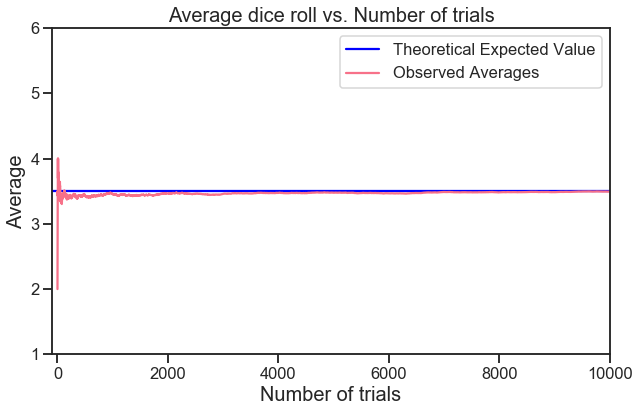

In [217]:
moving_average = []
for i, outcome in enumerate(die_outcomes):
    current_average = die_outcomes[:i+1].mean()
    moving_average.append(current_average)
    
moving_average_array = np.array(moving_average)

import seaborn as sns
sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(10,6))

ax.axhline(y=3.5, color='b')
x = np.linspace(0,10000,1)
plt.plot(moving_average_array)
ax.set_xlabel('Number of trials', fontsize=20)
ax.set_ylabel('Average', fontsize=20, )
plt.title('Average dice roll vs. Number of trials', fontsize=20)
ax.legend(['Theoretical Expected Value', 'Observed Averages'])

plt.ylim(1,6)
plt.xlim(-100,10000)
plt.show()

Above I simulated the rolling of a dice 10,000 times, and after each role calculated the average. Clearly, we do converge nicely to the expected value of 3.5!

#### 3.1.2 Expected Value of a Lottery Ticket
One fantastic use case for the expected value is in the case of financial decision making. For instance, let's say that you think playing the lottery is a worthwhile investment based on the chances of winning it big. Well, the expected value can help guide your decision from a numerical view point. 

We can model the process of purchasing a lottery ticket and playing (scratching the ticket to see what you won) as a random variable. A random variable, as we know, has an expected value. In this case, that is just the sum of all different outcomes, each weighted by it's probability. Just as in the dice example, the expected value will represent the average outcome that you will converge to in the long run, if you perform the process behind the random variable many times. 

So, let's say that the lottery ticket defines the outcomes and probabilities associated as follows: 

|Outcome (winnings)|Probability|
|------------------|-----------|
|\$2|$\frac{1}{15}$|
|\$4|$\frac{1}{42.86}$|
|\$5|$\frac{1}{75}$|
|\$10|$\frac{1}{200}$|
|\$25|$\frac{1}{300}$|
|\$50|$\frac{1}{1589.40}$|
|\$100|$\frac{1}{8000}$|
|\$200|$\frac{1}{16000}$|
|\$500|$\frac{1}{48000}$|
|\$1000|$\frac{1}{40000}$|

And that the lottery ticket costs \$1. Now, we can calculate the expected value of the ticket based on the summation of each outcome times it's respective probability:

<span style="font-size:12px">
$$E[X] = 2 \cdot \frac{1}{15} + 4 \cdot \frac{1}{42.86} +  5 \cdot \frac{1}{75} + 10 \cdot \frac{1}{200} + 25 \cdot \frac{1}{300} + 50 \cdot \frac{1}{1589.40} + 100 \cdot \frac{1}{8000} +  200 \cdot \frac{1}{16000} + 500 \cdot \frac{1}{48000} +1000 \cdot \frac{1}{4000} = 0.51 $$
</span>

We arrive at an expected value of \$0.51. What can we make of this result? Well, we are essentially being given concrete financial advice! In the long run, if buy many lottery tickets, we can expect to win \$0.51 on average. However, the cost of this ticket is \$1 every time we play. This means that in the long run we can expect to _lose money_ by playing the lottery! We can visualize this just as we visualized the rolling of a die:

In [197]:
sample_from_outcomes = np.random.choice
potential_outcomes = [0, 2, 4, 5, 10, 25, 50, 100, 200, 500, 1000]
outcome_probabilities = [0.8874723872122715, (1/15), (1/42.86), (1/75), (1/200), (1/300), (1/1589.40), (1/8000), 
                        (1/16000), (1/48000), (1/40000)]

outcomes = sample_from_outcomes(potential_outcomes, size=100000, p=outcome_probabilities)
print('Average after 100,000 simulated die rolls: ', outcomes.mean())

Average after 100,000 simulated die rolls:  0.52809


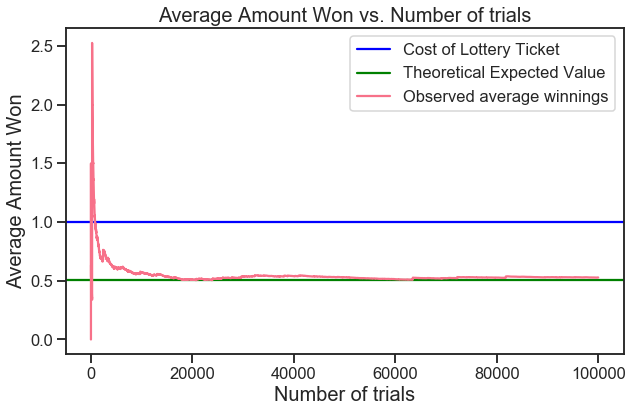

In [200]:
moving_average = []
for i, outcome in enumerate(outcomes):
    current_average = outcomes[:i+1].mean()
    moving_average.append(current_average)
    
moving_average_array = np.array(moving_average)

fig, ax = plt.subplots(figsize=(10,6))

ax.axhline(y=1, color='b')
ax.axhline(y=0.51, color='g')
x = np.linspace(0,100000,1)
plt.plot(moving_average_array)
ax.set_xlabel('Number of trials', fontsize=20)
ax.set_ylabel('Average Amount Won', fontsize=20, )
plt.title('Average Amount Won vs. Number of trials', fontsize=20)
ax.legend(['Cost of Lottery Ticket','Theoretical Expected Value', 'Observed average winnings'])

plt.show()

The visual above is very enlightening! It can clearly be seen that the expected value of the ticket (a random variable) converges to ~\$0.51 over time, while the cost of the ticket is \$1. If you don't want to lose money on the long, avoid the lottery. 

### 3.1.3 Law of Large Numbers
So far I have been frequently referring the concept of _performing an experiment many times_ and that a random variable will _converge to it's expected value in the long run_. This is formalized via the **Law of Large Numbers**. The law of large numbers states:

> The results obtained from a large number of trials concerning a random variable should be close to the expected value, and will tend to become closer as more trials are performed. 

The law of large numbers if important because it guarantees _stable_ long term results for the averages of some random events. For example, while a casino (or the lottery) may lose money in a single spin or ticket, the earnings will tend towards a predictable percentage over a large number of spins. 

This same effect is used extensively in the insurance industry, only here it is referred to as **expected loss**. The idea is the same though! To determine the expected loss of insuring a 19 year old male driver, they calculate (from historical data and mathematical models) the probability he will get into an accident, and then place a value on what it will take to fix the car in that place. Let's say (to keep things simple), they determine he has a 10% chance of getting into an accident this year, and that the accident will cost \$3,000 to fix. The expected loss in that case is:

$$3000 * 0.10 = 300$$

So, the insurance company will then set a monthly rate that guarantees that they charge more than that expected value on the whole of the year. Of course this is incredibly dumbed down, but was just meant to show how wide spread the expected value (and loss) really is!

### 3.2 Variance
We now should have an intuitive grasp on what the expected value is, which allows us to dig into the details a bit further when it comes to **variance** and **standard deviation**. To begin, we can define variance with the new vocabulary we have learned concerning the expected value:

> **Variance**:  Variance is the _expectation_ of the squared deviation of a random variable from its mean.

Now the above brings in a very interesting idea: that is the _expectation_ of an expression, not simply a random variable:

$$Var(X) = E \big[(X - \mu)^2 \big]$$

Above we see that we are trying to find the expected value of the expression $(X - \mu)^2$. In other words, if we repeatedly evaluated that expression, what would it's average/mean be in the long run. Now, before we get into the derivation, I just want to make sure the following is clear: $X$ is our random variable, and $\mu$ is it's mean value. So, to build on what we intuitively mentioned earlier, the variance is representing the _spread_ of our data. If the mean of $X$ is 150, but the data is very spread out (airline passengers) then we will end up with a larger variance. This intuively made sense before, and it still does with our updated definition.

With that said, let's start dissecting the above formula. First and foremost, it should be immediately clear that $\mu$, the mean, is simply the expected value of $X$! So we can replace it in the equation to get:

$$Var(X) = E \big[(X - E[X])^2 \big]$$

We can then expand the equation as follows:

$$Var(X) = E \big[X^2 - 2XE[X] + E[X]^2 \big]$$

Now with the help of two [basic properties](https://en.wikipedia.org/wiki/Expected_value#Basic_properties) of the expected value, we can reduce this even further. The properties are:

1. The expected value of a constant is simply the constant. For example, if $X = c$ then $E[X] = c$. Keep in mind that in our general case, $E[X]$ is equal to the mean of $X$, $\mu_X$. In other words, $E[X]$ is itself a constant. So, based on previous argument, if we take the expectation of an expectation, we simply get the inner expectation: $E\big[E[X]\big] = E[X]$.
2. The expected value demonstrates _linearity_. This can be shown via: 
<br>
$$E[X+Y] = E[X] + E[Y]$$
<br>
and:
$$E[aX] = aE[X]$$

With this two properties in our toolbelt, we can further reduce our equation to:

$$Var(X) = E[X^2] - 2E[X]E[X] + E[X]^2$$

Which can be reduce to the final desired form:

$$Var(X) = E[X^2] - E[X]^2$$

In other words, we see that the variance of $X$ is equivalent to the mean of the square of $X$ minus the square of the mean of $X$. Now, if we think back to our earlier definition of variance, we recall it was: 

$$Var(X) = \frac{1}{n} \sum_{i-1}^n \big(x_i - \mu\big)^2$$

Can we get our updated version that is in terms of expected values to reduce to this version? Yes! The derivation is as follows:

$$Var(X) = E \big[(X - \mu)^2 \big]$$

$$Var(X) = \frac{1}{n} \sum_i^n (x_i - \mu)^2$$

These two viewpoints of variance will come up frequently, so it is good to be familiar with both!

## 4. Distributions

### 4.1 Gaussian

### 4.2 Confidence Intervals

## 5. Central Limit Theorem

In [307]:
from IPython.core.display import HTML

n = 1000 # 1000 simulations (1000 sample means drawn)

In [327]:
# Function that will plot the histogram, where current is the latest figure
def clt(current):
    # if animation is at the last frame, stop it
    plt.cla()

    if current == 1000: 
        a.event_source.stop()

    plt.hist(avg[0:current])

    plt.gca().set_title('Expected value of die rolls')
    plt.gca().set_xlabel('Sample mean from 10 die rolls')
    plt.gca().set_ylabel('Frequency')
    plt.ylim(0,275)
    plt.axvline(x=3.5, ymax=275, color="b") 
    plt.legend(['Theoretical Expected Value'])
    plt.annotate('Die roll = {}'.format(current), [3,27])

In [328]:
# Sample size of 5
avg = []
for i in range(1,n):
    a = np.random.randint(1,7,5)
    avg.append(np.average(a))

In [329]:
fig = plt.figure(figsize=(10,6))
a = HTML(animation.FuncAnimation(fig=fig, func=clt, frames=np.arange(0,1000), interval=50, repeat_delay=2000).to_html5_video())
plt.close() # To prevent it from displaying in notebook
a

In [330]:
# Sample size of 10
avg = []
for i in range(1,n):
    a = np.random.randint(1,7,10)
    avg.append(np.average(a))

In [331]:
fig = plt.figure(figsize=(10,6))
a = HTML(animation.FuncAnimation(fig=fig, func=clt, frames=np.arange(0,1000), interval=50, repeat_delay=2000).to_html5_video())
plt.close() # To prevent it from displaying in notebook
a

In [332]:
# Sample size of 50
avg = []
for i in range(1,n):
    a = np.random.randint(1,7,50)
    avg.append(np.average(a))

In [333]:
fig = plt.figure(figsize=(10,6))
a = HTML(animation.FuncAnimation(fig=fig, func=clt, frames=np.arange(0,1000), interval=50, repeat_delay=2000).to_html5_video())
plt.close() # To prevent it from displaying in notebook
a

## 6. Hypothesis Testing

### 6.1 Standard Error

### 6.2 t-test

### 6.3 p-value
